# 전체 학기 / 학생의 일반특성만 _ 폴리노미얼 적용

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
# 데이터 로드
df = pd.read_csv('./data/studentInfo.csv')

SyntaxError: invalid syntax (2337741541.py, line 2)

In [5]:
df.columns

Index(['id_student', 'gender', 'region', 'highest_education', 'imd_band',
       'age_band', 'disability', 'final_result'],
      dtype='object')

In [4]:
df = df.drop(['code_module', 'code_presentation', 'num_of_prev_attempts', 'studied_credits'], axis=1)

In [6]:
# 모든 컬럼이 같은 행을 삭제
df = df.drop_duplicates(subset=df.columns.difference(['final_result']), keep='first').reset_index(drop=True)
df.duplicated(subset=df.columns.difference(['final_result'])).sum()

# withdrawn이면 1, 아니면 0 인 dropout_status 컬럼 생성
df['dropout_status'] = np.where(df['final_result'] == 'Withdrawn', 1, 0)
df = df.drop(['final_result'], axis=1)
df = df.drop_duplicates(keep='first').reset_index(drop=True)
df.duplicated().sum()
ids_with_both = df.groupby('id_student')['dropout_status'].nunique()
ids_with_both = ids_with_both[ids_with_both > 1].index
df = df[~df['id_student'].isin(ids_with_both)].reset_index(drop=True)

In [ ]:
def preprocess_features(data):
    # ----- 매핑 딕셔너리 -----
    gender_map = {'F': 0, 'M': 1}
    disability_map = {'N': 0, 'Y': 1}
    age_band_map = {'0-35': 0, '35-55': 1, '55<=': 2} #이상-미만 
    he_map = {
        'No Formal quals': 0,
        'Lower Than A Level': 1,
        'A Level or Equivalent': 2,
        'HE Qualification': 3,
        'Post Graduate Qualification': 4
    }
    imd_map = {
        '0-10%': 1, '10-20': 2, '20-30%': 3, '30-40%': 4, '40-50%': 5,
        '50-60%': 6, '60-70%': 7, '70-80%': 8, '80-90%': 9, '90-100%': 10
    }
    region_map = {
        'East Anglian Region': 0,
        'East Midlands Region': 1,
        'Ireland': 2,
        'London Region': 3,
        'North Region': 4,
        'North Western Region': 5,
        'Scotland': 6,
        'South East Region': 7,
        'South Region': 8,
        'South West Region': 9,
        'Wales': 10,
        'West Midlands Region': 11,
        'Yorkshire Region': 12
    }

    # ----- 2) 라벨 인코딩 -----
    data['gender'] = data['gender'].map(gender_map)
    data['disability'] = data['disability'].map(disability_map)
    data['age_band'] = data['age_band'].map(age_band_map)
    data['highest_education'] = data['highest_education'].map(he_map)

    data['imd_band'] = data['imd_band'].replace('?', pd.NA).map(imd_map)
    data = data.dropna(subset=['imd_band'])  # '?'가 있던 행 제거

    data['region'] = data['region'].map(region_map)

    return data

In [10]:
df = preprocess_features(df)

/var/folders/3g/tlt8qmcx1nj7kqtx38v8dw380000gn/T/ipykernel_38061/848437386.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['region'] = data['region'].map(region_map)


In [11]:
df.head()

,id_student,gender,region,highest_education,imd_band,age_band,disability,dropout_status
0,11391,1,0,3,10.0,2,0,0
1,28400,0,6,3,3.0,1,0,0
2,30268,0,5,2,4.0,1,1,1
3,31604,0,7,2,6.0,1,0,0
4,32885,0,11,1,6.0,0,0,0


In [13]:
df.isnull().sum()

id_student           0
gender               0
region               0
highest_education    0
imd_band             0
age_band             0
disability           0
dropout_status       0
dtype: int64

In [15]:
# 중복 여부 확인
dup_ids = df[df.duplicated(subset=["id_student"], keep=False)]

print(f"중복된 id_student 개수: {dup_ids['id_student'].nunique()}")
print(f"전체 중복 행 수: {dup_ids.shape[0]}")

# 중복된 id_student 예시 보기
#dup_ids.sort_values(by="id_student").head(20)

중복된 id_student 개수: 32
전체 중복 행 수: 64


,id_student,gender,region,highest_education,imd_band,age_band,disability,dropout_status
13899,131222,1,8,2,10.0,0,0,0
10392,131222,1,8,2,10.0,1,0,0
12737,227491,0,11,2,2.0,0,0,1
13937,227491,0,11,2,2.0,1,0,1
12798,298040,0,8,3,9.0,0,0,0
8598,298040,0,8,3,9.0,1,0,0
2665,303617,0,10,1,1.0,0,0,0
6331,303617,0,10,1,1.0,1,0,0
8653,353660,1,11,2,7.0,0,0,1
10543,353660,1,11,2,7.0,1,0,1


In [16]:
# id_student가 중복된 그룹에서 age_band == 1인 행만 삭제
df = df[~((df.duplicated(subset='id_student', keep=False)) & (df['age_band'] == 1))].copy()


(27783, 8)
   id_student  gender  region  highest_education  imd_band  age_band  \
0       11391       1       0                  3      10.0         2   
1       28400       0       6                  3       3.0         1   
2       30268       0       5                  2       4.0         1   
3       31604       0       7                  2       6.0         1   
4       32885       0      11                  1       6.0         0   

   disability  dropout_status  
0           0               0  
1           0               0  
2           1               1  
3           0               0  
4           0               0  


In [17]:
df.shape

(27783, 8)

In [18]:
df.head()

,id_student,gender,region,highest_education,imd_band,age_band,disability,dropout_status
0,11391,1,0,3,10.0,2,0,0
1,28400,0,6,3,3.0,1,0,0
2,30268,0,5,2,4.0,1,1,1
3,31604,0,7,2,6.0,1,0,0
4,32885,0,11,1,6.0,0,0,0


In [21]:
#df.isnull().sum()

In [20]:
# 중복 여부 확인
dup_ids = df[df.duplicated(subset=["id_student"], keep=False)]

print(f"중복된 id_student 개수: {dup_ids['id_student'].nunique()}")
print(f"전체 중복 행 수: {dup_ids.shape[0]}")

# 중복된 id_student 예시 보기
dup_ids.sort_values(by="id_student").head(20)

중복된 id_student 개수: 0
전체 중복 행 수: 0


,id_student,gender,region,highest_education,imd_band,age_band,disability,dropout_status


In [25]:
df.head()

,id_student,gender,region,highest_education,imd_band,age_band,disability,dropout_status
0,11391,1,0,3,10.0,2,0,0
1,28400,0,6,3,3.0,1,0,0
2,30268,0,5,2,4.0,1,1,1
3,31604,0,7,2,6.0,1,0,0
4,32885,0,11,1,6.0,0,0,0


--------------------<전처리 완료>----------------------

# 분류 모델

In [29]:
# 데이터 분리 & 평가
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, f1_score

# 분류 모델들
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# 부스팅 계열
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures

In [23]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
X =df[['gender','region','highest_education','imd_band','age_band','disability']]
y = df['dropout_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
cat_cols = ['gender','region','highest_education','disability']
num_cols = ['imd_band','age_band']

# 범주형
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
Xtr_cat = pd.DataFrame(ohe.fit_transform(X_train[cat_cols]),
                       index=X_train.index, columns=ohe.get_feature_names_out(cat_cols))
Xte_cat = pd.DataFrame(ohe.transform(X_test[cat_cols]),
                       index=X_test.index, columns=ohe.get_feature_names_out(cat_cols))

# 숫자형 + 폴리노미얼
scaler = StandardScaler()
Xtr_num = pd.DataFrame(scaler.fit_transform(X_train[num_cols]), index=X_train.index, columns=num_cols)
Xte_num = pd.DataFrame(scaler.transform(X_test[num_cols]), index=X_test.index, columns=num_cols)

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
Xtr_poly = pd.DataFrame(poly.fit_transform(Xtr_num), index=X_train.index,
                        columns=poly.get_feature_names_out(num_cols))
Xte_poly = pd.DataFrame(poly.transform(Xte_num), index=X_test.index,
                        columns=poly.get_feature_names_out(num_cols))

# 선형 모델용
Xtr_lin = pd.concat([Xtr_cat, Xtr_poly], axis=1)
Xte_lin = pd.concat([Xte_cat, Xte_poly], axis=1)

# 트리 모델용
Xtr_tree = pd.concat([Xtr_cat, X_train[num_cols].reset_index(drop=True)], axis=1)
Xte_tree = pd.concat([Xte_cat, X_test[num_cols].reset_index(drop=True)], axis=1)

In [39]:
models = {
    #"LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric="logloss", use_label_encoder=False),
    "LightGBM": LGBMClassifier(random_state=42),
    "GaussianNB": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "LinearSVM": SVC(kernel="linear", probability=True, random_state=42)
}

[LightGBM] [Info] Number of positive: 7064, number of negative: 15162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 36
[LightGBM] [Info] Number of data points in the train set: 22226, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.317826 -> initscore=-0.763781
[LightGBM] [Info] Start training from score -0.763781
=== Model comparison ===
           Model  Train_Acc  Test_Acc  Precision(1)  Recall(1)    F1(1)  ROC-AUC  TP  FP   TN   FN   Gap_Acc
GradientBoosting   0.682264  0.686342      0.468750   0.017251 0.033278 0.579980  30  34 3784 1709 -0.004078
        LightGBM   0.689553  0.684722      0.463277   0.047154 0.085595 0.571476  82  95 3723 1657  0.004831
      GaussianNB   0.662962  0.667267      0.397388   0.122484 0.187253 0.570839 213 323 3495 

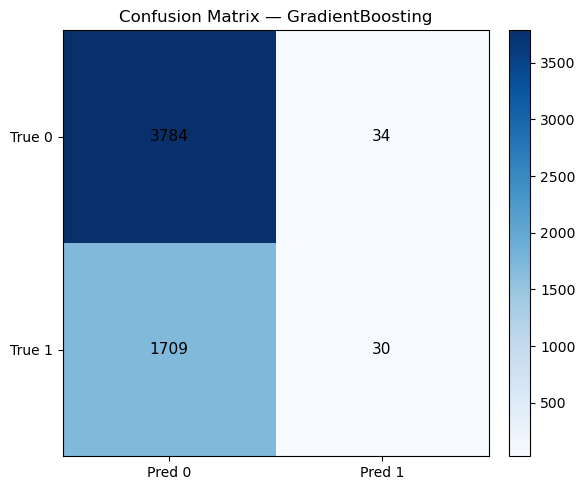

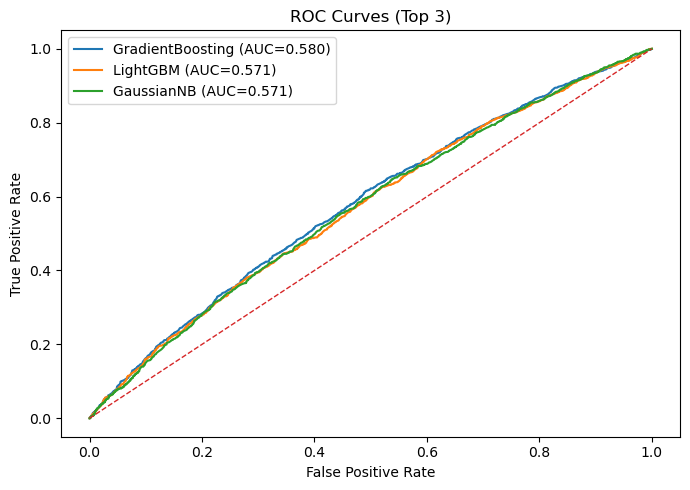

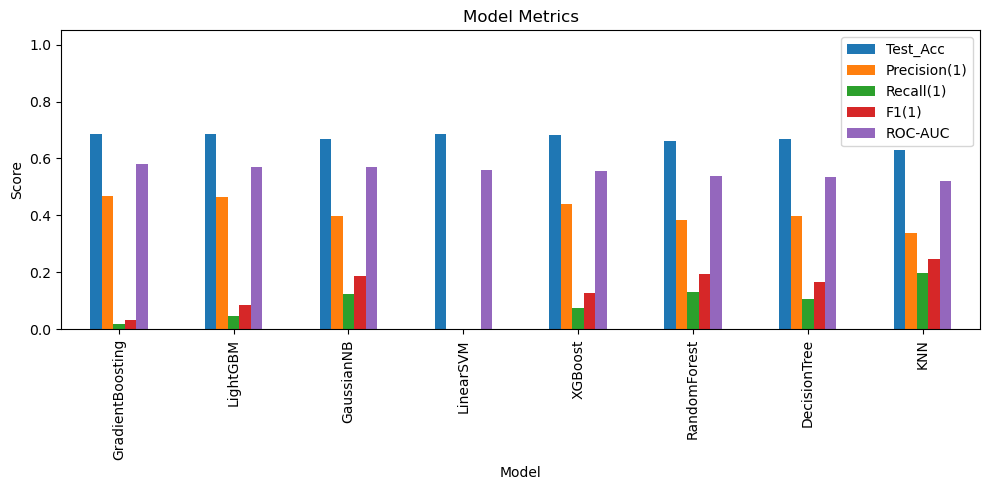

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)

# ==== 1) 평가 유틸 ====
def predict_scores(model, X):
    """probability가 없으면 decision_function, 그것도 없으면 예측값 사용"""
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    elif hasattr(model, "decision_function"):
        s = model.decision_function(X)
        # min-max 정규화로 [0,1] 스코어화
        s_min, s_max = s.min(), s.max()
        return (s - s_min) / (s_max - s_min + 1e-12)
    else:
        return model.predict(X)  # 확률대신 0/1

def evaluate_models(models, X_tr, y_tr, X_te, y_te):
    rows = []
    rocs = {}          # ROC 곡선 그릴 때 사용
    reports = {}       # classification_report 텍스트 저장
    cms = {}           # 혼동행렬 저장

    for name, clf in models.items():
        try:
            clf.fit(X_tr, y_tr)

            ytr_pred = clf.predict(X_tr)
            yte_pred = clf.predict(X_te)
            yte_score = predict_scores(clf, X_te)

            tr_acc = accuracy_score(y_tr, ytr_pred)
            te_acc = accuracy_score(y_te, yte_pred)
            te_prec = precision_score(y_te, yte_pred, zero_division=0)
            te_rec  = recall_score(y_te, yte_pred, zero_division=0)
            te_f1   = f1_score(y_te, yte_pred, zero_division=0)
            te_auc  = roc_auc_score(y_te, yte_score)

            tn, fp, fn, tp = confusion_matrix(y_te, yte_pred).ravel()
            fpr, tpr, _ = roc_curve(y_te, yte_score)

            rows.append({
                "Model": name,
                "Train_Acc": tr_acc,
                "Test_Acc": te_acc,
                "Precision(1)": te_prec,
                "Recall(1)": te_rec,
                "F1(1)": te_f1,
                "ROC-AUC": te_auc,
                "TP": tp, "FP": fp, "TN": tn, "FN": fn,
                "Gap_Acc": tr_acc - te_acc
            })
            rocs[name] = (fpr, tpr, te_auc)
            reports[name] = classification_report(y_te, yte_pred, zero_division=0)
            cms[name] = np.array([[tn, fp],[fn, tp]])

        except Exception as e:
            print(f"[WARN] {name} 실패: {e}")

    df = pd.DataFrame(rows).sort_values("ROC-AUC", ascending=False)
    return df, rocs, reports, cms

# ==== 2) 실행 ====
df_results, rocs, reports, cms = evaluate_models(models, X_train, y_train, X_test, y_test)

print("=== Model comparison ===")
print(df_results.to_string(index=False))

best_name = df_results.iloc[0]["Model"]
print(f"\nBest by ROC-AUC: {best_name}\n")
print("=== Classification Report (Best) ===")
print(reports[best_name])

# ==== 3) 시각화 ====
plt.figure(figsize=(6,5))
cm = cms[best_name]
im = plt.imshow(cm, cmap="Blues")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks([0,1], ["Pred 0","Pred 1"])
plt.yticks([0,1], ["True 0","True 1"])
for (i,j), v in np.ndenumerate(cm):
    plt.text(j, i, f"{v}", ha="center", va="center", fontsize=11)
plt.title(f"Confusion Matrix — {best_name}")
plt.tight_layout()
plt.show()

# ROC 곡선 (상위 3개만 표시)
top_k = 3
plt.figure(figsize=(7,5))
for name in df_results.head(top_k)["Model"]:
    fpr, tpr, auc = rocs[name]
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
plt.plot([0,1],[0,1],'--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curves (Top {top_k})")
plt.legend()
plt.tight_layout()
plt.show()

# 주요 지표 막대그래프
plot_cols = ["Test_Acc", "Precision(1)", "Recall(1)", "F1(1)", "ROC-AUC"]
ax = df_results.set_index("Model")[plot_cols].plot(kind="bar", figsize=(10,5))
plt.title("Model Metrics")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

In [42]:
# 로지스틱 
# 릿지  

from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [43]:
# === 1) 모델 정의 (Logistic + Ridge만) ===

models_lin = {
    "Logistic(L2)": LogisticRegression(
        penalty="l2", solver="liblinear", max_iter=500, random_state=42
    ),
    "RidgeClassifier": RidgeClassifier(alpha=1.0, random_state=42)
}

# === 2) 평가 실행 (선형 모델 → 폴리노미얼 + OHE 데이터 사용) ===
df_results_lin, rocs_lin, reports_lin, cms_lin = evaluate_models(
    models_lin, Xtr_lin, y_train, Xte_lin, y_test
)

print("=== Logistic & Ridge (Polynomial + OHE) ===")
print(df_results_lin.to_string(index=False))

# === 3) 베스트 모델 리포트 ===
best_name_lin = df_results_lin.iloc[0]["Model"]
print(f"\nBest by ROC-AUC: {best_name_lin}")
print(reports_lin[best_name_lin])

=== Logistic & Ridge (Polynomial + OHE) ===
          Model  Train_Acc  Test_Acc  Precision(1)  Recall(1)    F1(1)  ROC-AUC  TP  FP   TN   FN   Gap_Acc
RidgeClassifier   0.682129  0.686342      0.409091   0.005175 0.010221 0.577494   9  13 3805 1730 -0.004213
   Logistic(L2)   0.681904  0.686162      0.435897   0.009776 0.019123 0.577037  17  22 3796 1722 -0.004258

Best by ROC-AUC: RidgeClassifier
              precision    recall  f1-score   support

           0       0.69      1.00      0.81      3818
           1       0.41      0.01      0.01      1739

    accuracy                           0.69      5557
   macro avg       0.55      0.50      0.41      5557
weighted avg       0.60      0.69      0.56      5557



- 나이 겹치는 애들은 가장 과거의 데이터 (0)의 행만 선택



- Bestmodel 하이퍼 파라미터 튜닝 
- 앙상블 모델 활용 

# 앙상블

In [51]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold

In [44]:
df.head()

,id_student,gender,region,highest_education,imd_band,age_band,disability,dropout_status
0,11391,1,0,3,10.0,2,0,0
1,28400,0,6,3,3.0,1,0,0
2,30268,0,5,2,4.0,1,1,1
3,31604,0,7,2,6.0,1,0,0
4,32885,0,11,1,6.0,0,0,0


In [ ]:
#df.to_csv('./data/ver3_data.csv')

In [46]:
df.drop(columns='id_student')
X = df.drop(columns=['dropout_status'])
y = df['dropout_status']

In [48]:
# 학습 테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
) 

In [53]:
# 앙상블 모델 정의 

base_estimators = [
    ("rf",  RandomForestClassifier(n_estimators=200, random_state=42)),
    ("gb",  GradientBoostingClassifier(random_state=42)),
    ("xgb", XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False)),
    ("lgb", LGBMClassifier(random_state=42)),
]

[LightGBM] [Info] Number of positive: 7042, number of negative: 15184
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 22226, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.316836 -> initscore=-0.768350
[LightGBM] [Info] Start training from score -0.768350


[15:17:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[15:17:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[15:17:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[15:17:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[15:17:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



[LightGBM] [Info] Number of positive: 5634, number of negative: 12147
[LightGBM] [Info] Number of positive: 5633, number of negative: 12147
[LightGBM] [Info] Number of positive: 5634, number of negative: 12147
[LightGBM] [Info] Number of positive: 5633, number of negative: 12148
[LightGBM] [Info] Number of positive: 5634, number of negative: 12147
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 17781, number of used features: 7
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.316855 -> initscore=-0.768263
[LightGBM] [Info] Number

[15:18:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[15:18:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[15:18:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[15:18:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[15:18:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



[LightGBM] [Info] Number of positive: 5633, number of negative: 12147
[LightGBM] [Info] Number of positive: 5634, number of negative: 12147
[LightGBM] [Info] Number of positive: 5634, number of negative: 12147
[LightGBM] [Info] Number of positive: 5634, number of negative: 12147
[LightGBM] [Info] Number of positive: 5633, number of negative: 12148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 17780, number of used features: 7
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Auto-choosing row-wise

[15:18:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[15:18:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[15:18:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[15:18:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[15:18:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



[LightGBM] [Info] Number of positive: 5634, number of negative: 12147
[LightGBM] [Info] Number of positive: 5633, number of negative: 12147
[LightGBM] [Info] Number of positive: 5633, number of negative: 12148
[LightGBM] [Info] Number of positive: 5634, number of negative: 12147
[LightGBM] [Info] Number of positive: 5634, number of negative: 12147
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can

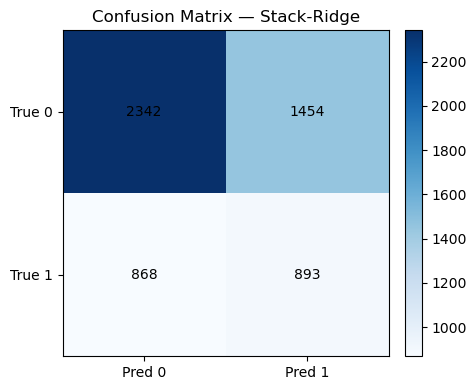

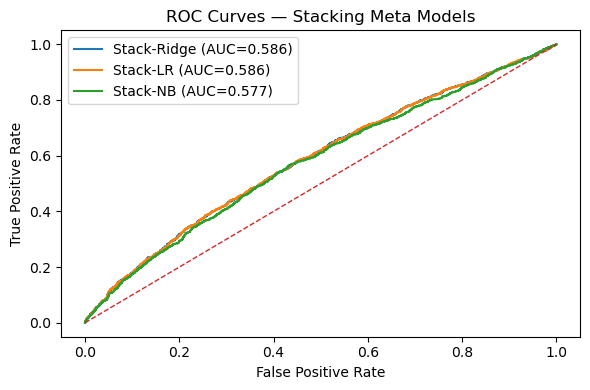

In [54]:

cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2) 메타 모델 후보 3종
stack_lr = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(
        max_iter=2000, C=1.0, penalty="l2", class_weight="balanced", random_state=42
    ),
    stack_method="predict_proba",  # 베이스 모델 확률을 메타모델 입력으로
    passthrough=False,
    cv=cv5,
    n_jobs=-1
)

stack_ridge = StackingClassifier(
    estimators=base_estimators,
    final_estimator=RidgeClassifier(
        alpha=1.0, class_weight="balanced", random_state=42
    ),
    # RidgeClassifier는 predict_proba가 없으니, 베이스는 확률로 주되 메타는 선형결정경계 사용
    stack_method="predict_proba",
    passthrough=False,
    cv=cv5,
    n_jobs=-1
)

stack_nb = StackingClassifier(
    estimators=base_estimators,
    final_estimator=GaussianNB(),
    stack_method="predict_proba",
    passthrough=False,
    cv=cv5,
    n_jobs=-1
)

# 3) 비교 대상 dict 구성 (이름은 보고서에 그대로 찍힘)
stack_models = {
    "Stack-LR": stack_lr,
    "Stack-Ridge": stack_ridge,
    "Stack-NB": stack_nb,
}

# 4) 평가 실행 (네가 만든 evaluate_models 함수 재사용)
df_stack, rocs_stack, reports_stack, cms_stack = evaluate_models(
    stack_models, X_train, y_train, X_test, y_test
)

print("=== Stacking Meta-Model Comparison ===")
print(df_stack.to_string(index=False))

best_name = df_stack.iloc[0]["Model"]
print(f"\nBest by ROC-AUC: {best_name}\n")
print("=== Classification Report (Best) ===")
print(reports_stack[best_name])

# (선택) 혼동행렬 & ROC 시각화
import matplotlib.pyplot as plt
import numpy as np
cm = cms_stack[best_name]
plt.figure(figsize=(5,4))
im = plt.imshow(cm, cmap="Blues")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks([0,1], ["Pred 0","Pred 1"])
plt.yticks([0,1], ["True 0","True 1"])
for (i,j), v in np.ndenumerate(cm):
    plt.text(j, i, f"{v}", ha="center", va="center")
plt.title(f"Confusion Matrix — {best_name}")
plt.tight_layout()
plt.show()

from sklearn.metrics import roc_curve
plt.figure(figsize=(6,4))
for name in df_stack["Model"]:
    fpr, tpr, auc = rocs_stack[name]
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
plt.plot([0,1],[0,1],'--', linewidth=1)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curves — Stacking Meta Models")
plt.legend(); plt.tight_layout(); plt.show()

____________________

# 파생변수 포함한 앙상블 모델

In [72]:
data3 = pd.read_csv('./data/data_data_data.csv')

In [60]:
data3.head()

,id_student,gender,region,highest_education,imd_band,age_band,disability,highest_education_score,age_band_score,age_band_mid,...,region_share,edu_global_share,age_global_share,gender_in_region_share,age_in_region_share,region_disability_rate,region_avg_credit,edu_region_avg_credit,age_avg_credit,target
0,11391,1,0,1,9,2,0,2.0,2,60.0,...,0.106092,0.141160,0.006385,0.514072,0.004192,0.117964,77.958084,74.733146,74.850746,0
1,28400,0,6,1,2,1,0,2.0,1,45.0,...,0.109078,0.141160,0.286164,0.409726,0.329062,0.108328,76.977286,78.718264,75.245310,0
2,30268,0,5,0,3,1,1,1.0,1,45.0,...,0.092148,0.437139,0.286164,0.419166,0.273009,0.113754,80.679076,80.703252,75.245310,1
3,31604,0,7,0,5,1,0,1.0,1,45.0,...,0.067054,0.437139,0.286164,0.476551,0.302226,0.116059,79.111795,80.585162,75.245310,0
4,32885,0,11,2,5,0,0,0.0,0,17.5,...,0.080776,0.405374,0.707452,0.462839,0.769957,0.091624,80.987023,79.843318,81.641523,0


In [73]:
data3 = data3.dropna()

In [74]:
data3

,id_student,gender,region,highest_education,imd_band,age_band,disability,highest_education_score,age_band_score,age_band_mid,...,region_share,edu_global_share,age_global_share,gender_in_region_share,age_in_region_share,region_disability_rate,region_avg_credit,edu_region_avg_credit,age_avg_credit,target
0,11391,1,0,1,9,2,0,2.0,2,60.0,...,0.106092,0.141160,0.006385,0.514072,0.004192,0.117964,77.958084,74.733146,74.850746,0
1,28400,0,6,1,2,1,0,2.0,1,45.0,...,0.109078,0.141160,0.286164,0.409726,0.329062,0.108328,76.977286,78.718264,75.245310,0
2,30268,0,5,0,3,1,1,1.0,1,45.0,...,0.092148,0.437139,0.286164,0.419166,0.273009,0.113754,80.679076,80.703252,75.245310,1
3,31604,0,7,0,5,1,0,1.0,1,45.0,...,0.067054,0.437139,0.286164,0.476551,0.302226,0.116059,79.111795,80.585162,75.245310,0
4,32885,0,11,2,5,0,0,0.0,0,17.5,...,0.080776,0.405374,0.707452,0.462839,0.769957,0.091624,80.987023,79.843318,81.641523,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31477,2640965,0,10,2,1,0,0,0.0,0,17.5,...,0.066260,0.405374,0.707452,0.500000,0.676894,0.073346,81.601151,81.223103,81.641523,0
31478,2645731,0,0,2,4,1,0,0.0,1,45.0,...,0.106092,0.405374,0.286164,0.485928,0.284731,0.117964,77.958084,76.899727,75.245310,0
31479,2648187,0,8,0,2,0,1,1.0,0,17.5,...,0.096690,0.437139,0.707452,0.434297,0.688239,0.112681,77.933640,79.737221,81.641523,0
31480,2679821,0,7,2,9,1,0,0.0,1,45.0,...,0.067054,0.405374,0.286164,0.476551,0.302226,0.116059,79.111795,75.677492,75.245310,1


In [76]:
#data3.isnull().sum()

In [78]:
data3.drop(columns='id_student')
X = data3.drop(columns=['target'])
y = data3['target']

In [79]:
# 학습 테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
) 

[LightGBM] [Info] Number of positive: 7819, number of negative: 17104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 24923, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.313726 -> initscore=-0.782756
[LightGBM] [Info] Start training from score -0.782756


[16:05:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[16:05:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[16:05:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[16:05:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[16:05:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



[LightGBM] [Info] Number of positive: 6255, number of negative: 13683
[LightGBM] [Info] Number of positive: 6255, number of negative: 13683
[LightGBM] [Info] Number of positive: 6256, number of negative: 13683
[LightGBM] [Info] Number of positive: 6255, number of negative: 13684
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019996 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 19938, number of used features: 36
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Number of positive: 6255, number of negative: 13683
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.313723 -> initscore=-0.782773
[LightGBM] [Info] Total Bins 774
[LightGBM] [Info] Start

[16:06:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[16:06:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[16:06:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[16:06:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[16:06:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



[LightGBM] [Info] Number of positive: 7819, number of negative: 17104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 24923, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.313726 -> initscore=-0.782756
[LightGBM] [Info] Start training from score -0.782756


[16:06:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[16:06:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[16:06:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[16:06:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[16:06:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1730232611148/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



[LightGBM] [Info] Number of positive: 6255, number of negative: 13683
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 19938, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.313723 -> initscore=-0.782773
[LightGBM] [Info] Start training from score -0.782773
[LightGBM] [Info] Number of positive: 6255, number of negative: 13683
[LightGBM] [Info] Number of positive: 6255, number of negative: 13683
[LightGBM] [Info] Number of positive: 6255, number of negative: 13684
[LightGBM] [Info] Number of positive: 6256, number of negative: 13683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[L

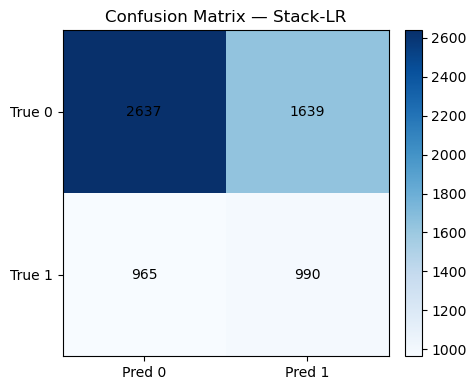

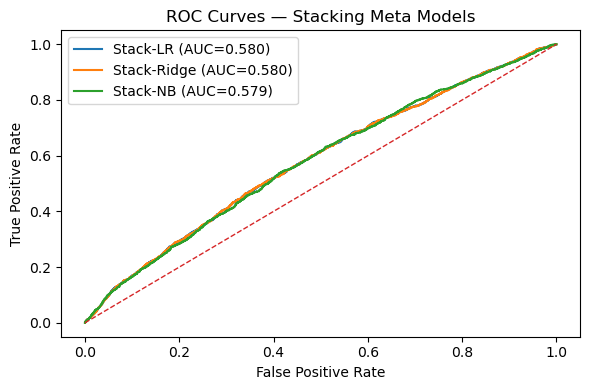

In [80]:
# 1) CV 정의
cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2) 메타모델 3종 정의
stack_lr = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(
        max_iter=2000, C=1.0, penalty="l2", class_weight="balanced", random_state=42
    ),
    stack_method="predict_proba",
    passthrough=False,
    cv=cv5,
    n_jobs=-1
)

stack_ridge = StackingClassifier(
    estimators=base_estimators,
    final_estimator=RidgeClassifier(
        alpha=1.0, class_weight="balanced", random_state=42
    ),
    stack_method="predict_proba",
    passthrough=False,
    cv=cv5,
    n_jobs=-1
)

stack_nb = StackingClassifier(
    estimators=base_estimators,
    final_estimator=GaussianNB(),
    stack_method="predict_proba",
    passthrough=False,
    cv=cv5,
    n_jobs=-1
)

# 3) 비교 대상
stack_models = {
    "Stack-LR": stack_lr,
    "Stack-Ridge": stack_ridge,
    "Stack-NB": stack_nb,
}

# 4) 평가 실행
df_stack, rocs_stack, reports_stack, cms_stack = evaluate_models(
    stack_models, X_train, y_train, X_test, y_test
)

# 5) 핵심 결과만 출력
print("\n=== Stacking Meta-Model Comparison (Sorted by ROC-AUC) ===")
print(df_stack.sort_values("ROC-AUC", ascending=False).to_string(index=False))

best_name = df_stack.iloc[0]["Model"]
print(f"\n=== Best Meta Model: {best_name} ===")
print(reports_stack[best_name])

# 6) 시각화
cm = cms_stack[best_name]
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.colorbar(fraction=0.046, pad=0.04)
plt.xticks([0,1], ["Pred 0","Pred 1"])
plt.yticks([0,1], ["True 0","True 1"])
for (i,j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha="center", va="center")
plt.title(f"Confusion Matrix — {best_name}")
plt.tight_layout()
plt.show()


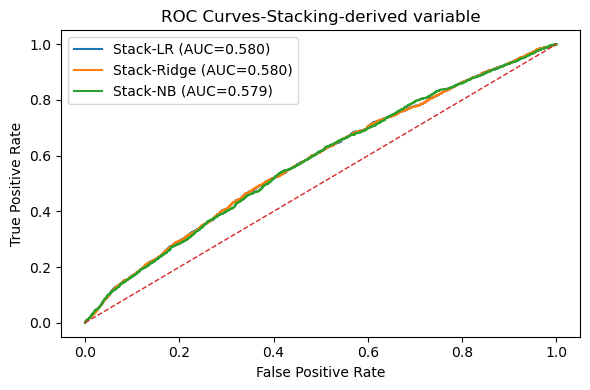

In [81]:

plt.figure(figsize=(6,4))
for name in df_stack["Model"]:
    fpr, tpr, auc = rocs_stack[name]
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
plt.plot([0,1],[0,1],'--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves-Stacking-derived variable")
plt.legend()
plt.tight_layout()
plt.show()